In [103]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# Load the data
df= pd.read_csv("data\preprocessed_ro_n_red.csv")
# Select everything except quality
#X = df.iloc[:,0:-1]
X= df.iloc[:,0:-1]
Y = df.iloc[:,-1]
columns_names= X.columns.to_numpy()

#Apply PCA (Principal Component Analysis)
pca = PCA(n_components=1)
fit = pca.fit(X)
print("Explained Variance:",fit.explained_variance_ratio_) 
componentsList=fit.components_
columns_names
type(columns_names)
# Separating out the features
df_feature_weights= pd.DataFrame(data=componentsList,columns=columns_names)
# sort by columns from max to min
df_feature_weights=df_feature_weights.sort_values(by=0,axis=1,ascending=False)
df_feature_weights=df_feature_weights.abs()
print(df_feature_weights.sort_values(by=0,axis=1,ascending=False))
# plot the features
fig = px.histogram(df_feature_weights,x=columns_names,histnorm='probability density')
fig.show()



Explained Variance: [0.2689214]
   fixed acidity  citric acid        pH   density  volatile acidity  \
0       0.521135     0.496594  0.425069  0.342422          0.314796   

   sulphates  chlorides  free sulfur dioxide  residual sugar  \
0   0.217785   0.127586             0.109816        0.081631   

   total sulfur dioxide   alcohol  
0              0.046851  0.012348  


In [98]:
import plotly.express as px
import pandas as pd
df_wine_data= pd.read_csv("data\preprocessed_ro_n_white.csv")

fig = px.histogram(df_wine_data,x='quality')
fig.show()


AxesSubplot(0.125,0.11;0.62x0.77)


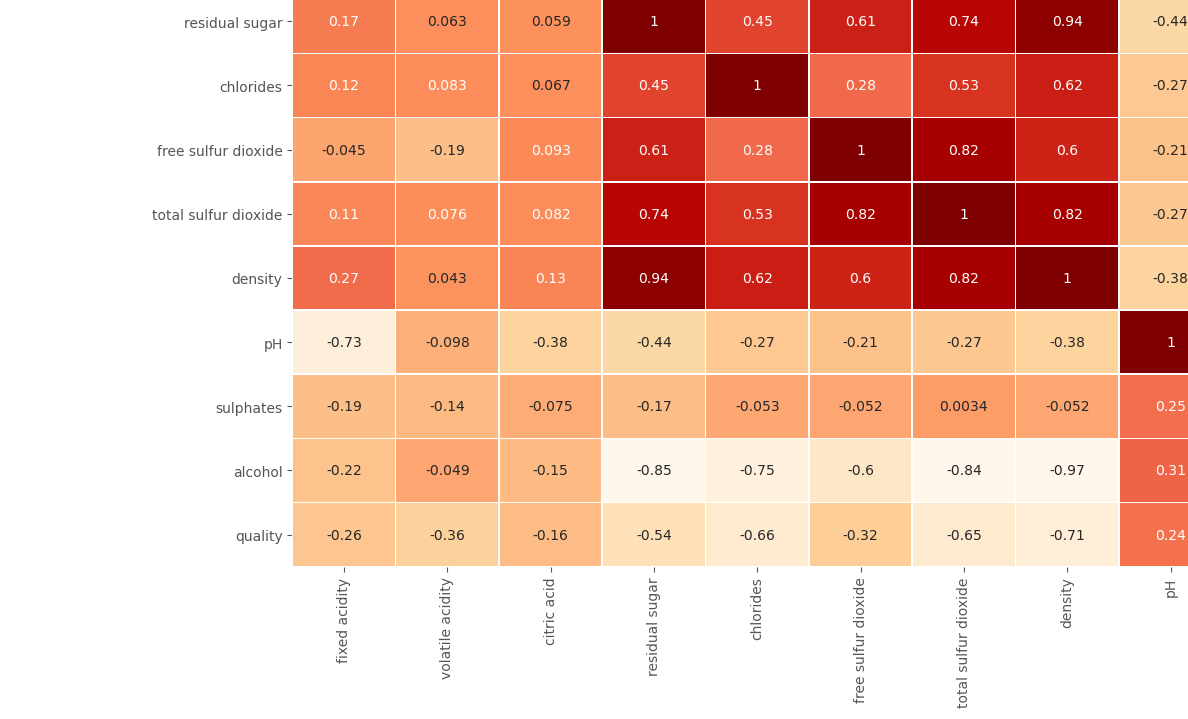

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
fig = plt.figure(figsize = (20,10))
df_wine_data= pd.read_csv("data\preprocessed_ro_n_white.csv")
df_correlations=df_wine_data.corr()
#robust : if True and vmin or vmax are absent, the colormap range is computed with robust quantiles instead of the extreme values.
print(sns.heatmap(df_correlations.corr(),annot = True,linewidths=.5,robust=True,cmap ='OrRd'))
